<a href="https://colab.research.google.com/github/bchenley/MachineLearningPortfolio/blob/main/Notebooks/PrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/bchenley/MachineLearningPortfolio.git

Cloning into 'MachineLearningPortfolio'...
remote: Enumerating objects: 1798, done.
remote: Counting objects: 100% (422/422), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 1798 (delta 295), reused 393 (delta 274), pack-reused 1376
Receiving objects: 100% (1798/1798), 15.03 MiB | 14.69 MiB/s, done.
Resolving deltas: 100% (1046/1046), done.


In [2]:
%cd /content/MachineLearningPortfolio/src

/content/MachineLearningPortfolio/src


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from eda import describe, annotate_bar
from decomposition import eig


In [4]:
country_data = pd.read_csv("https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
describe(country_data)[['count', 'mean', 'min', 'max', 'skew', 'dtype', 'cardinality', 'missing']]

,count,mean,min,max,skew,dtype,cardinality,missing
country,167,NaN,NaN,NaN,NaN,object,167,0
child_mort,167,38.27006,2.6,208.0,1.437710,float64,139,0
exports,167,41.108976,0.109,200.0,2.423800,float64,147,0
health,167,6.815689,1.81,17.9,0.699391,float64,147,0
imports,167,46.890215,0.0659,174.0,1.888120,float64,151,0
income,167,17144.688623,609.0,125000.0,2.211386,int64,156,0
inflation,167,7.781832,-4.21,104.0,5.107640,float64,156,0
life_expec,167,70.555689,32.1,82.8,-0.962252,float64,127,0
total_fer,167,2.947964,1.15,7.49,0.958383,float64,138,0
gdpp,167,12964.155689,231.0,105000.0,2.198079,int64,157,0


In [130]:
y_name = ['country']
X_name = [name for name in country_data.columns if name not in y_name]

X = country_data[X_name]
y = country_data[y_name]

## Principal Component Analysis (PCA)

1. **Center** the dataset to have zero mean or **Standardize** it to have zerio mean and unit standard deviation.

2. Use the preprocessed dataset to compute the **covariance matrix**.

3. Apply **eigendecomposition** to the covariance matrix. Sort the **eigenvalues** in descending order and rearrange the **eigenvectors** accordingly. The eigenvectors are the **Principal Components (PC)**. Their corresponding eigenvalues determine the amount of variance explained in the original data and the direction of each PC determines the direction in which this variance is explained.

4. Select the top **k** eigenvectors that capture the most variance. The k eigenvectors are the new **feature space** and serve as a **basis**/**coordinate system** for the data. Possible ways to select k:
  - Prior knowledge of the number of components desired
  - Desired to explain minimum amount of variance
  - **Kaiser rule**: Select the PCs with eigenvalues > 1.0. PCs with eigenvalues <= 1 explain no more variance any one of the features in the original data.

5. Project the preprocessed data onto the new feature space to produce the **reduced dataset**


In [131]:
## Step 1) Center/standardize data.
standard_scaler = StandardScaler()
X_pp = standard_scaler.fit_transform(country_data[X_name]) # preprocessed data
##

n_samples, n_features = X.shape

In [132]:
## Step 2) Compute covariance matrix
cov_X = np.cov(X_pp.T) # or np.cov(X, rowvar = False)
##

In [133]:
## Step 3) Apply eigendecomposition
eval, pc = eig(cov_X) # custom eig method sorts the evals

variance_percent_explained = eval/eval.sum()
variance_cumalative_percent_explained = variance_percent_explained.cumsum()
##

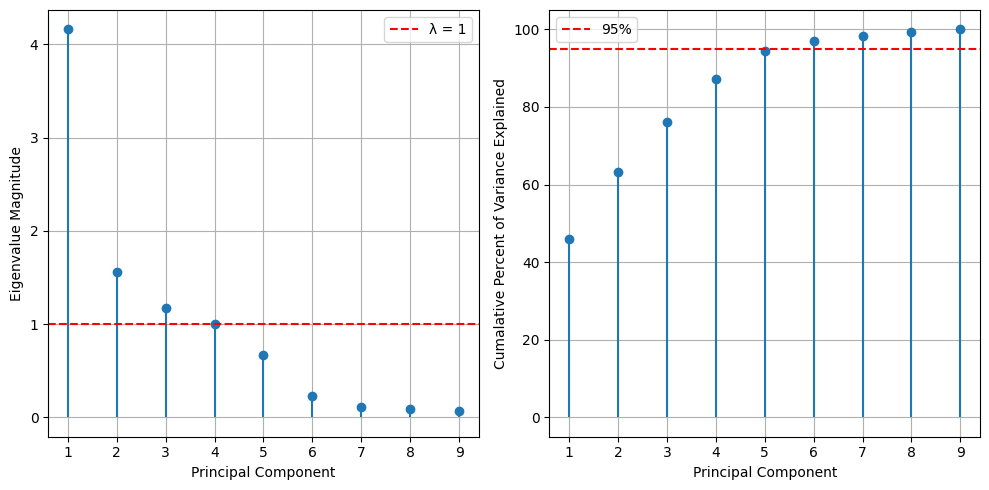

In [134]:
# Visualize PCs
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].stem(np.arange(1,n_features+1), eval,
           basefmt = " ")
ax[0].axhline(y = 1, color = 'r', linestyle = '--', label = "λ = 1")
ax[0].legend()
ax[0].set_xticks(np.arange(1, n_features+1))
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue Magnitude')
ax[0].grid(True)


ax[1].stem(np.arange(1,n_features+1), variance_cumalative_percent_explained*100,
           basefmt = " ")
ax[1].axhline(y = 95, color = 'r', linestyle = '--', label = '95%')
ax[1].legend()
ax[1].set_xticks(np.arange(1, n_features+1))
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cumalative Percent of Variance Explained')
ax[1].grid(True)

plt.tight_layout()
plt.show() ;
#

In [135]:
## Step 4) Select the top k eigenvectors based on some criteria

# # Use Kaiser rule
# k = (eval > 1).sum()
# #

# Use minimum threshold
threshold = 0.95
k = np.where(variance_cumalative_percent_explained >= 0.95)[0][0] + 1
#

eval_k = eval[:k]
pc_k = pc[:, :k]

print(f"{k} PCs selected.")
print(f"{variance_cumalative_percent_explained[k-1]*100:.2f} of variance retained.")
##

6 PCs selected.
97.02 of variance retained.


In [136]:
## Step 5) Project the preprocessed data onto the PC space
X_proj = X_pp @ pc_k
##

<Figure size 1000x1000 with 0 Axes>

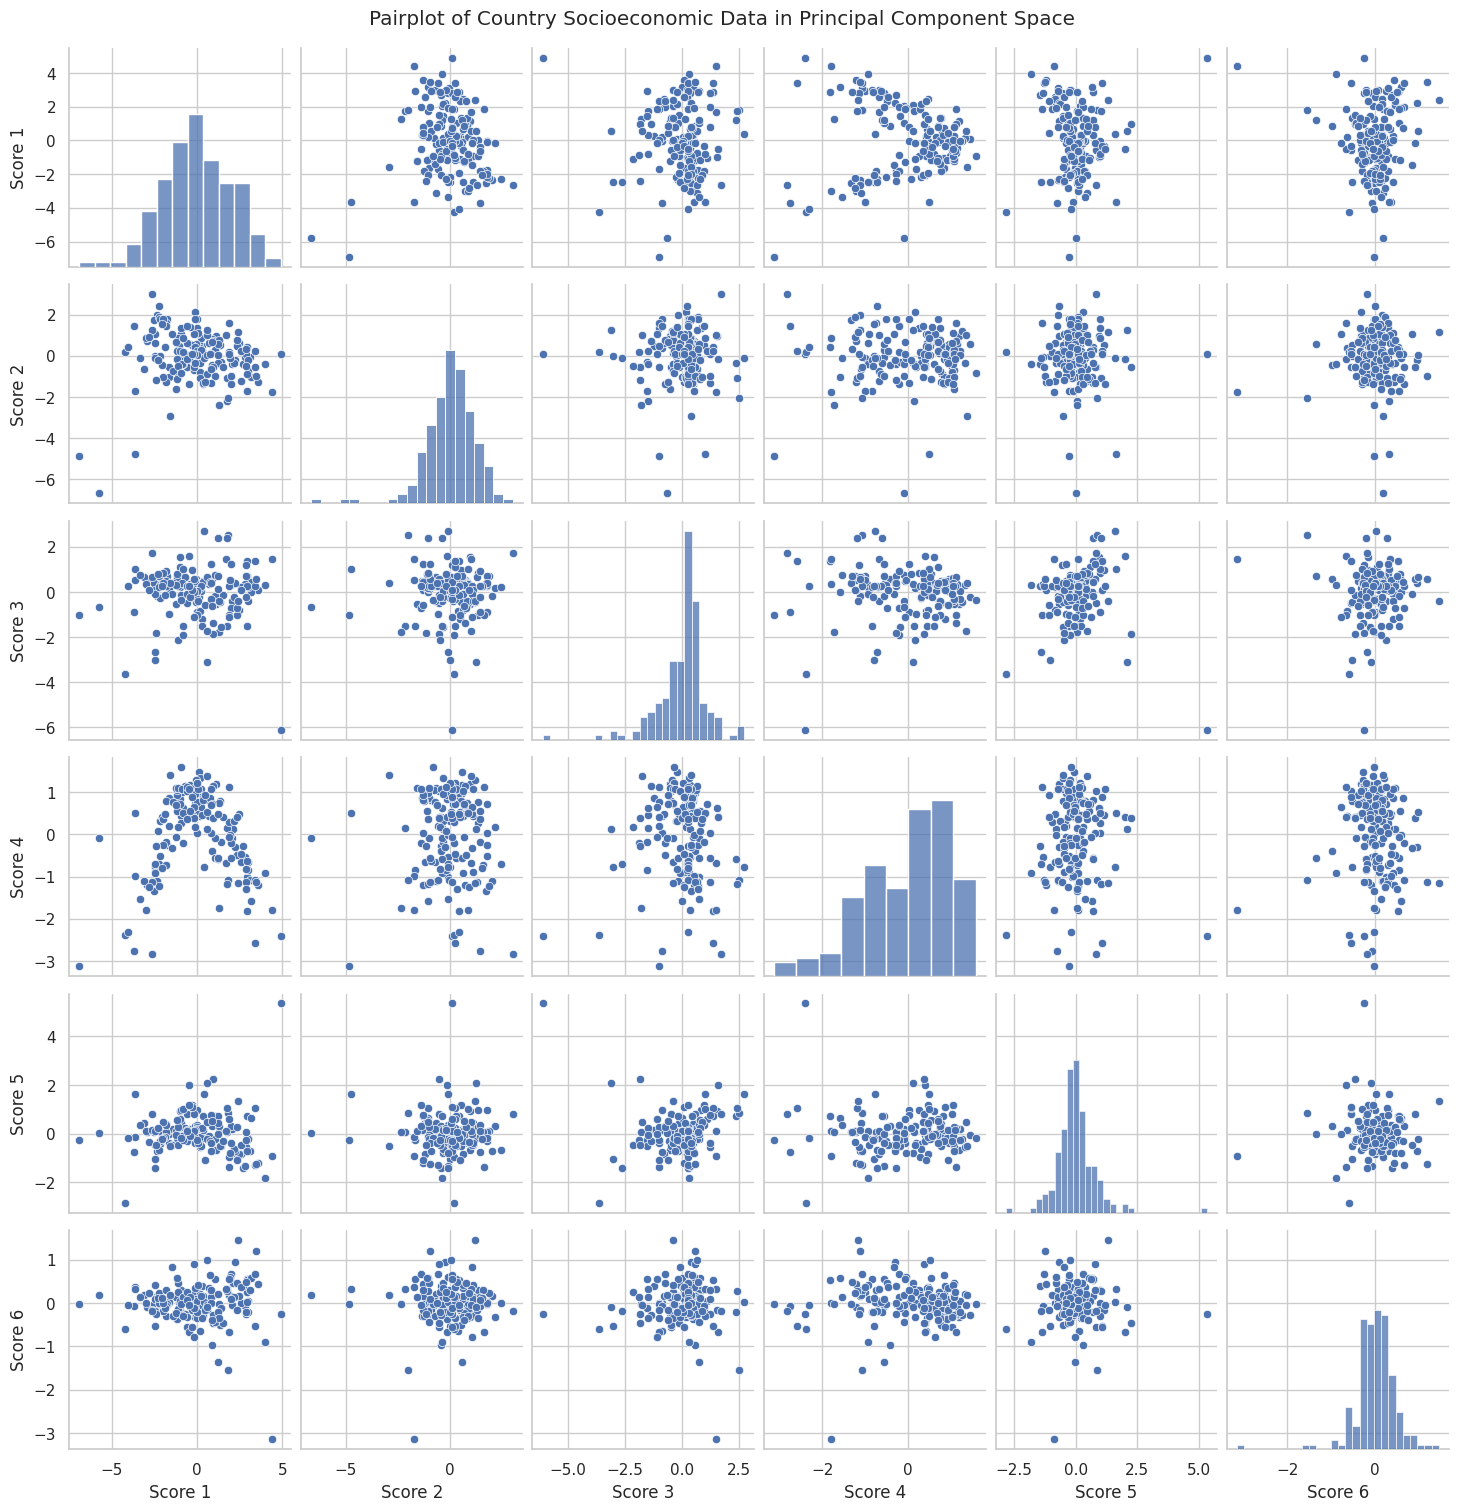

In [164]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 10)) ;
pairplot = sns.pairplot(pd.DataFrame(X_proj,
                          columns = [f"Score {i+1}" for i in range(k)])) ;
pairplot.fig.suptitle('Pairplot of Country Socioeconomic Data in Principal Component Space', y = 1.01) ;
plt.show() ;

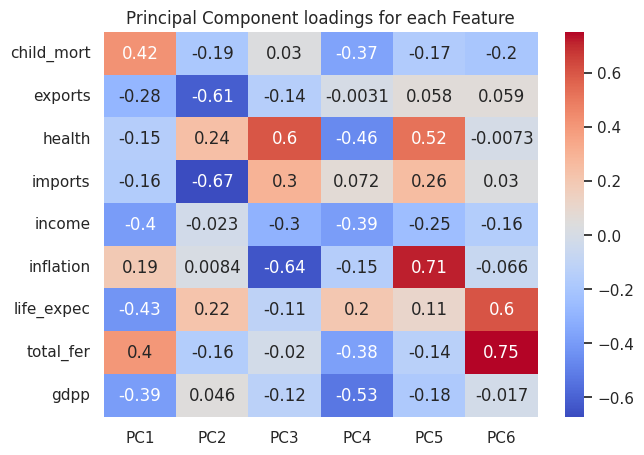

In [165]:
# Visualize the contribution (loading) of each feature on each PC.
loadings = pd.DataFrame(pc_k,
                        columns = [f"PC{i+1}" for i in range(k)],
                        index = X_name)

plt.figure(figsize = (7, 5))
sns.heatmap(loadings,
            annot = True,
            cmap = 'coolwarm') ;
plt.title('Principal Component loadings for each Feature') ;
#

The PCs may be examined to hypothesize "themes" for each PC. For example,

- PC1: The Population growth (interactin of fertility and mortality)
- PC2: The economic activity (imports and exports)
- PC3: The interaction of health and economics, perhaps food supply
- PC4: Inidivual Economic productivity
- PC5: Impact of inflation
- PC6: The reproductive health of the a country

Let's look at the US and Brazil

In [180]:
country = ['United States', 'Brazil']
country_data.loc[np.isin(country_data['country'], country)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.80,11200
159,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400


In [181]:
country_data_proj = pd.DataFrame(X_proj,
                                 columns = [f"Score {i+1}" for i in range(k)],
                                 index = country_data['country'])

country_data_proj.loc[np.isin(country_data['country'], country)]

,Score 1,Score 2,Score 3,Score 4,Score 5,Score 6
country,,,,,,
Brazil,-0.140781,2.151077,0.172635,0.16692,0.298665,-0.327505
United States,-2.641206,2.997364,1.721878,-2.82711,0.818656,-0.190431
